# Brain concentration data analysis

In [1]:
import os
import fnmatch
import pandas as pd
import csv
import numpy as np
from pathlib import Path
from openpyxl import load_workbook
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")


In [2]:
# white background 
sns.set(style="ticks", context="talk")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.8})
plt.style.use('default')


In [3]:
# Definitions

analysis_path = os.path.dirname(os.getcwd())
path = os.path.dirname(analysis_path)

raw_data_path = f'{path}/raw_data/01_Results_ratbrain_experiment_1.xlsx'
rat_list = ['Rat^{}'.format(i) for i in range(66, 90)]
rat_list_brain = ['Rat{}'.format(x) for x in pd.Index(np.arange(1,25)).astype(str).str.zfill(2)]

In [4]:
df = pd.read_excel(raw_data_path, header = 0, engine = 'openpyxl')
df.pop('Index')
df


,Sample Name,Dilution Factor,Component Name,Calculated Concentration µg/L,Outlier Reasons
0,Brain_Rat01_tube01,1.0504,3-IAA,19.479,Concentration
1,Brain_Rat01_tube01,1.0504,DMT,121.498,NaN
2,Brain_Rat01_tube01,1.0504,DMT-N-Oxide,2.407,NaN
3,Brain_Rat01_tube01,1.0504,NMT,0.518,NaN
4,Brain_Rat01_tube01,1.0504,Harmine,nd,Concentration
...,...,...,...,...,...
283,Brain_Rat24_tube48,1.3736,DMT,1.572,NaN
284,Brain_Rat24_tube48,1.3736,DMT-N-Oxide,traces,Concentration
285,Brain_Rat24_tube48,1.3736,NMT,nd,Concentration
286,Brain_Rat24_tube48,1.3736,Harmine,0.675,Concentration


In [5]:
## allocate rat to corresponding group based on rat number, here this approach works

# Insert column treatment_group at position 1
df.insert(loc=1, column='Treatment_Group', value=0)    
df.loc[(df['Sample Name'].str.contains('Rat01')) | (df['Sample Name'].str.contains('Rat02')) | (df['Sample Name'].str.contains('Rat15')) | (df['Sample Name'].str.contains('Rat16')) | (df['Sample Name'].str.contains('Rat17')) | (df['Sample Name'].str.contains('Rat18')), 'Treatment_Group'] = 'Veh'
df.loc[(df['Sample Name'].str.contains('Rat07')) | (df['Sample Name'].str.contains('Rat08')) | (df['Sample Name'].str.contains('Rat11')) | (df['Sample Name'].str.contains('Rat12')) | (df['Sample Name'].str.contains('Rat19')) | (df['Sample Name'].str.contains('Rat20')), 'Treatment_Group'] = 'Har'  
df.loc[(df['Sample Name'].str.contains('Rat03')) | (df['Sample Name'].str.contains('Rat04')) | (df['Sample Name'].str.contains('Rat13')) | (df['Sample Name'].str.contains('Rat14')) | (df['Sample Name'].str.contains('Rat23')) | (df['Sample Name'].str.contains('Rat24')), 'Treatment_Group'] = 'DMT'
df.loc[(df['Sample Name'].str.contains('Rat05')) | (df['Sample Name'].str.contains('Rat06')) | (df['Sample Name'].str.contains('Rat09')) | (df['Sample Name'].str.contains('Rat10')) | (df['Sample Name'].str.contains('Rat21')) | (df['Sample Name'].str.contains('Rat22')), 'Treatment_Group'] = 'Har + DMT'  

# Insert column treatment_group_# at position 2
df.insert(loc=2, column='Treatment_Group_#', value=0)
df.loc[(df['Sample Name'].str.contains('Rat01')) | (df['Sample Name'].str.contains('Rat02')) | (df['Sample Name'].str.contains('Rat15')) | (df['Sample Name'].str.contains('Rat16')) | (df['Sample Name'].str.contains('Rat17')) | (df['Sample Name'].str.contains('Rat18')), 'Treatment_Group_#'] = 1
df.loc[(df['Sample Name'].str.contains('Rat07')) | (df['Sample Name'].str.contains('Rat08')) | (df['Sample Name'].str.contains('Rat11')) | (df['Sample Name'].str.contains('Rat12')) | (df['Sample Name'].str.contains('Rat19')) | (df['Sample Name'].str.contains('Rat20')), 'Treatment_Group_#'] = 2  
df.loc[(df['Sample Name'].str.contains('Rat03')) | (df['Sample Name'].str.contains('Rat04')) | (df['Sample Name'].str.contains('Rat13')) | (df['Sample Name'].str.contains('Rat14')) | (df['Sample Name'].str.contains('Rat23')) | (df['Sample Name'].str.contains('Rat24')), 'Treatment_Group_#'] = 3
df.loc[(df['Sample Name'].str.contains('Rat05')) | (df['Sample Name'].str.contains('Rat06')) | (df['Sample Name'].str.contains('Rat09')) | (df['Sample Name'].str.contains('Rat10')) | (df['Sample Name'].str.contains('Rat21')) | (df['Sample Name'].str.contains('Rat22')), 'Treatment_Group_#'] = 4  

# Insert column with sample number (2 per rat brain)
df.insert(loc=4, column='Sample Number', value=0)
df.loc[(df['Sample Name'].str.contains('tube01')) | (df['Sample Name'].str.contains('tube03')) |
       (df['Sample Name'].str.contains('tube05')) | (df['Sample Name'].str.contains('tube07')) |
       (df['Sample Name'].str.contains('tube09')) | (df['Sample Name'].str.contains('tube11')) |
       (df['Sample Name'].str.contains('tube13')) | (df['Sample Name'].str.contains('tube15')) |
       (df['Sample Name'].str.contains('tube17')) | (df['Sample Name'].str.contains('tube19')) |
       (df['Sample Name'].str.contains('tube21')) | (df['Sample Name'].str.contains('tube23')) |
       (df['Sample Name'].str.contains('tube25')) | (df['Sample Name'].str.contains('tube27')) |
       (df['Sample Name'].str.contains('tube29')) | (df['Sample Name'].str.contains('tube31')) |
       (df['Sample Name'].str.contains('tube33')) | (df['Sample Name'].str.contains('tube35')) |
       (df['Sample Name'].str.contains('tube37')) | (df['Sample Name'].str.contains('tube39')) |
       (df['Sample Name'].str.contains('tube41')) | (df['Sample Name'].str.contains('tube43')) |
       (df['Sample Name'].str.contains('tube45')) | (df['Sample Name'].str.contains('tube47')) |
       (df['Sample Name'].str.contains('Plasma')),'Sample Number'] = 1  ##sample 1 = cerebellum

df.loc[(df['Sample Name'].str.contains('tube02')) | (df['Sample Name'].str.contains('tube04')) |
       (df['Sample Name'].str.contains('tube06')) | (df['Sample Name'].str.contains('tube08')) |
       (df['Sample Name'].str.contains('tube10')) | (df['Sample Name'].str.contains('tube12')) |
       (df['Sample Name'].str.contains('tube14')) | (df['Sample Name'].str.contains('tube16')) |
       (df['Sample Name'].str.contains('tube18')) | (df['Sample Name'].str.contains('tube20')) |
       (df['Sample Name'].str.contains('tube22')) | (df['Sample Name'].str.contains('tube24')) |
       (df['Sample Name'].str.contains('tube26')) | (df['Sample Name'].str.contains('tube28')) |
       (df['Sample Name'].str.contains('tube30')) | (df['Sample Name'].str.contains('tube32')) |
       (df['Sample Name'].str.contains('tube34')) | (df['Sample Name'].str.contains('tube36')) |
       (df['Sample Name'].str.contains('tube38')) | (df['Sample Name'].str.contains('tube40')) |
       (df['Sample Name'].str.contains('tube42')) | (df['Sample Name'].str.contains('tube44')) |
       (df['Sample Name'].str.contains('tube46')) | (df['Sample Name'].str.contains('tube48')),'Sample Number'] = 2 ## sample 2 = front. cort.



# nd = not detected, traces = very low concentration detected -> set these values to 0
df.loc[df['Calculated Concentration µg/L'] == 'nd', 'Calculated Concentration µg/L'] = 0
df.loc[df['Calculated Concentration µg/L'] == 'traces', 'Calculated Concentration µg/L'] = 0



df['Calculated Concentration µg/L'] = df['Calculated Concentration µg/L'].astype(float)

df.to_excel(f'{analysis_path}/01_Results_ratsamples_analysis.xlsx', sheet_name="Rat_brain_with_group", index = False)


## Calculate Statistics 

mean and sd for each group:

Brain has two samples per rat -> first sample belongs to the frontal cortex, second sample to the cerebellum 

In [6]:
# Get all the component names

ls_components = df[~df.duplicated('Component Name')]
ls_components = ls_components['Component Name'].tolist()
ls_components

# List groups
ls_group = ['Veh', 'Har', 'DMT', 'Har + DMT']
ls_group_number = [1, 2, 3, 4]



In [7]:
for group in ls_group_number:
    for component in ls_components:
        for rat in rat_list_brain:
            sample_1 = df.loc[((df['Sample Name'].str.contains('Brain') & df['Sample Name'].str.contains(rat) & (df['Sample Number']==1) & (df['Component Name']==component)))][df.columns[6]]
            sample_2 = df.loc[((df['Sample Name'].str.contains('Brain') & df['Sample Name'].str.contains(rat) & (df['Sample Number']==2) & (df['Component Name']==component)))][df.columns[6]]


            df_brain_1 = df[(df['Sample Name'].str.contains('Brain') & df['Sample Name'].str.contains(rat) & (df['Component Name']==component) & (df['Sample Number']==1))]
            df_brain_2 = df[(df['Sample Name'].str.contains('Brain') & df['Sample Name'].str.contains(rat) & (df['Component Name']==component) & (df['Sample Number']==2))]


### Update df to contain a categorical column differentiating between front. cort., cerebellum

In [8]:
## allocate rat to corresponding group based on rat number

def sample_allocation (row):
    if (('Brain' in row['Sample Name']) & (row['Sample Number']==1)):
        return 'Cerebellum'
    if (('Brain' in row['Sample Name']) & (row['Sample Number']==2)):
        return 'Front Cort'


In [9]:
#Sample 
#df.pop('Sample')
df.insert(loc=8, column='Sample', value=df.apply(lambda row: sample_allocation (row), axis=1))
df


df[((df['Treatment_Group']=='Har + DMT') & (df['Component Name']=='DMT') & (df['Sample Number']==1))]
df.to_excel(f'{analysis_path}/02_Results_concentration_brain.xlsx', index=False)

In [10]:
colors = ['#194D33', '#F50AA3', '#0AF1F5']
sns.set_palette(sns.color_palette(colors))

In [11]:
def sample_allocation2 (row):
    if (row['Sample Number']==1):
        return 'Cerebellum'
    if (row['Sample Number']==2):
        return 'Front Cort'


In [12]:
df1 = pd.read_excel(f'{analysis_path}/XX_data_metabolites_and_FDG.xlsx', header = 0, engine = 'openpyxl')
#df1.pop('Sample')
#df1.insert(loc=8, column='Sample', value=df.apply(lambda row: sample_allocation2 (row), axis=1))
df1[df1['Sample Number']==1]


,Rat #,Treatment_Group,Treatment_Group_#,Sample Name,Sample Number,Dilution Factor,Component Name,Calculated Concentration µg/L,medial_PFC_SUV,OFC_SUV,medial_PFC_wb_norm,OFC_wb_norm
0,Rat^71,Veh,1,Brain_Rat02_tube03,1,0.8803,DMT,8.809,6.81,6.62,6.98,6.78
1,Rat^72,DMT,3,Brain_Rat03_tube05,1,0.8643,DMT,9.750,7.08,6.84,6.76,6.52
2,Rat^73,DMT,3,Brain_Rat04_tube07,1,0.9634,DMT,9.787,7.05,6.89,6.63,6.48
3,Rat^66,Har + DMT,4,Brain_Rat05_tube09,1,0.8258,DMT,46.489,5.68,5.57,6.86,6.73
4,Rat^67,Har + DMT,4,Brain_Rat06_tube11,1,0.9099,DMT,255.311,5.94,5.40,7.30,6.63
5,Rat^68,Har,2,Brain_Rat07_tube13,1,1.0173,DMT,3.306,6.06,5.48,6.75,6.10
6,Rat^69,Har,2,Brain_Rat08_tube15,1,0.7519,DMT,0.865,5.35,4.47,6.99,5.83
7,Rat^78,Har + DMT,4,Brain_Rat09_tube17,1,1.1751,DMT,134.741,8.31,6.75,7.75,6.30
8,Rat^79,Har + DMT,4,Brain_Rat10_tube19,1,0.9066,DMT,137.164,6.27,6.49,6.99,7.24
9,Rat^80,Har,2,Brain_Rat11_tube21,1,1.1287,DMT,3.858,5.81,5.28,7.62,6.91


In [13]:
df_brain = df[df['Sample Name'].str.contains('Brain')]

df_brain_high = df_brain[(df_brain['Component Name']== 'DMT') | (df_brain['Component Name']== '3-IAA') | (df_brain['Component Name']== 'Harmine')]
df_brain_low = df_brain[(df_brain['Component Name']== 'DMT-N-Oxide') | (df_brain['Component Name']== 'NMT') | (df_brain['Component Name']== 'Harmol')]


### Statistics for groups brain metabolites

In [14]:
ls_group = ['Veh', 'Har', 'DMT', 'Har + DMT']
sample_loc = ['Cerebellum', 'Front Cort']
molecule = ['3-IAA', '3-IAA', 'DMT', 'DMT', 'DMT-N-Oxide', 'DMT-N-Oxide', 'NMT', 'NMT', 'Harmine', 'Harmine', 'Harmol', 'Harmol']

sample_loc_6 = ['Cerebellum', 'Front Cort', 
               'Cerebellum', 'Front Cort', 
               'Cerebellum', 'Front Cort', 
               'Cerebellum', 'Front Cort', 
               'Cerebellum', 'Front Cort',
               'Cerebellum', 'Front Cort']

In [15]:
##statistical calculations
# mean and sem of all activities per group
stats_of_components = []
mean_har_dmt = []
mean_dmt = []
mean_har = []
mean_veh = []

# get rid of outlier value in Veh group and DMT values (row 1 and 7)
df_brain_no_out = df_brain.copy()
df_brain_no_out.drop([1, 7], inplace = True)


#for group in ls_group:
for component in ls_components:
    for sample in sample_loc:
        
        for group in ls_group:
            # old with all groups combined # needs for loop group:
            mean_group = np.round(df_brain_no_out.loc[((df_brain['Treatment_Group']==group) & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].mean(), decimals = 2)
            std_group = np.round(df_brain_no_out.loc[((df_brain['Treatment_Group']==group) & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].std(), decimals = 2)
            sem_group = np.round(df_brain_no_out.loc[((df_brain['Treatment_Group']==group) & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].sem(), decimals = 2)
            
            stats_of_components_row = pd.DataFrame(data=[group, sample, component, mean_group, std_group, sem_group]).T
            stats_of_components_row.columns = ['Treatment_Group', 'Sample Number', 'Component Name', 'Concentration', 'STD', 'SEM']

            stats_of_components.append(stats_of_components_row) 

        
        
        mean = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='Veh') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].mean(), decimals = 1)
        sd = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='Veh') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].std(), decimals = 1)
        veh = f'{mean} ({sd})'
        mean_veh.append(veh)

        mean = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='DMT') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].mean(), decimals = 1)
        sd = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='DMT') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].std(), decimals = 1)
        dmt = f'{mean} ({sd})'
        mean_dmt.append(dmt)

        mean = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='Har') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].mean(), decimals = 1)
        sd = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='Har') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].std(), decimals = 1)
        har = f'{mean} ({sd})'
        mean_har.append(har)

        mean = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='Har + DMT') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].mean(), decimals = 1)
        sd = np.round(df_brain_no_out.loc[((df_brain_no_out['Treatment_Group']=='Har + DMT') & (df_brain_no_out['Component Name']==component) & (df_brain_no_out['Sample']==sample))][df_brain_no_out.columns[6]].std(), decimals = 1)
        har_dmt = f'{mean} ({sd})'
        mean_har_dmt.append(har_dmt)
   
stats_of_components = pd.concat(stats_of_components, axis=0)
stats_of_components.to_excel(f'{analysis_path}/03_Results_ratsamples_group_means.xlsx', sheet_name="stats", index = False)




### Latex table

In [16]:
df_mean_conc = pd.read_excel(f'{analysis_path}/03_Results_ratsamples_group_means.xlsx', header = 0, engine = 'openpyxl')
df_mean_conc

,Treatment_Group,Sample Number,Component Name,Concentration,STD,SEM
0,Veh,Cerebellum,3-IAA,13.26,3.68,1.50
1,Har,Cerebellum,3-IAA,11.12,1.92,0.78
2,DMT,Cerebellum,3-IAA,398.48,128.31,52.38
3,Har + DMT,Cerebellum,3-IAA,194.09,117.16,47.83
4,Veh,Front Cort,3-IAA,20.37,9.54,3.89
5,Har,Front Cort,3-IAA,14.15,1.18,0.48
6,DMT,Front Cort,3-IAA,503.90,137.73,56.23
7,Har + DMT,Front Cort,3-IAA,257.48,103.64,42.31
8,Veh,Cerebellum,DMT,5.95,6.31,2.82
9,Har,Cerebellum,DMT,4.05,5.06,2.07


In [17]:
df_brain_stats = pd.DataFrame([molecule]).T
df_brain_stats.set_axis(['compound'], axis='columns', inplace=True)

df_brain_stats.insert(loc=1, column='region', value=sample_loc_6)
df_brain_stats.insert(loc=2, column='Veh', value=mean_veh)
df_brain_stats.insert(loc=3, column='Har', value=mean_har)
df_brain_stats.insert(loc=4, column='DMT', value=mean_dmt)
df_brain_stats.insert(loc=5, column='Har + DMT', value=mean_har_dmt)

#df_brain_stats.drop()
#df_brain_stats.drop([4,5,6,7,10,11], inplace = True)
df_brain_stats.to_excel(f'{analysis_path}/table/stats_table.xlsx', sheet_name="stats", index = False)

df_brain_stats

/var/folders/lb/nxxqtlbj7yd1c5frnp5_vxk40000gn/T/ipykernel_93724/1993024220.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_brain_stats.set_axis(['compound'], axis='columns', inplace=True)


,compound,region,Veh,Har,DMT,Har + DMT
0,3-IAA,Cerebellum,13.3 (3.7),11.1 (1.9),398.5 (128.3),194.1 (117.2)
1,3-IAA,Front Cort,20.4 (9.5),14.1 (1.2),503.9 (137.7),257.5 (103.6)
2,DMT,Cerebellum,5.9 (6.3),4.1 (5.1),8.7 (3.6),105.1 (89.2)
3,DMT,Front Cort,10.8 (8.7),4.8 (4.4),14.5 (13.6),149.5 (123.2)
4,DMT-N-Oxide,Cerebellum,0.6 (1.0),0.0 (0.0),0.6 (0.2),6.2 (3.5)
5,DMT-N-Oxide,Front Cort,1.1 (2.1),0.0 (0.0),0.7 (0.6),5.0 (3.5)
6,NMT,Cerebellum,0.1 (0.2),0.0 (0.0),0.0 (0.0),0.2 (0.2)
7,NMT,Front Cort,0.1 (0.3),0.0 (0.0),0.0 (0.0),0.2 (0.1)
8,Harmine,Cerebellum,1.7 (3.0),103.9 (64.8),13.6 (31.0),189.0 (134.3)
9,Harmine,Front Cort,0.8 (0.6),128.4 (65.0),20.1 (46.0),325.6 (345.6)


In [18]:
### for latex table

df_brain_stats_latex = pd.DataFrame([molecule]).T
df_brain_stats_latex.set_axis(['\textbf{compound}'], axis='columns', inplace=True)
df_brain_stats_latex.insert(loc=1, column='\textbf{region}', value=list(map(lambda x: '{' + x +'}',sample_loc_6)))
#df_brain_stats_latex.loc[df_pet_stats_latex['\textbf{region}'] == 'accumbens', '\textbf{region}'] = 'NAc'
#df_brain_stats_latex.loc[df_pet_stats_latex['\textbf{region}'] == 'visual_cortex', '\textbf{region}'] = 'visual cortex'

df_brain_stats_latex.insert(loc=2, column='\textbf{Veh}', value=list(map(lambda x: '{' + x +'}', mean_veh)))
df_brain_stats_latex.insert(loc=3, column='\textbf{Har}', value=list(map(lambda x: '{' + x +'}', mean_har)))
df_brain_stats_latex.insert(loc=4, column='\textbf{DMT}', value=list(map(lambda x: '{' + x +'}', mean_dmt)))
df_brain_stats_latex.insert(loc=5, column='\textbf{Har + DMT}', value=list(map(lambda x: '{' + x +'}', mean_har_dmt)))

df_brain_stats_latex.drop([4,5,6,7,10,11], inplace = True)

df_brain_stats_latex


/var/folders/lb/nxxqtlbj7yd1c5frnp5_vxk40000gn/T/ipykernel_93724/78240549.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_brain_stats_latex.set_axis(['\textbf{compound}'], axis='columns', inplace=True)


,\textbf{compound},\textbf{region},\textbf{Veh},\textbf{Har},\textbf{DMT},\textbf{Har + DMT}
0,3-IAA,{Cerebellum},{13.3 (3.7)},{11.1 (1.9)},{398.5 (128.3)},{194.1 (117.2)}
1,3-IAA,{Front Cort},{20.4 (9.5)},{14.1 (1.2)},{503.9 (137.7)},{257.5 (103.6)}
2,DMT,{Cerebellum},{5.9 (6.3)},{4.1 (5.1)},{8.7 (3.6)},{105.1 (89.2)}
3,DMT,{Front Cort},{10.8 (8.7)},{4.8 (4.4)},{14.5 (13.6)},{149.5 (123.2)}
8,Harmine,{Cerebellum},{1.7 (3.0)},{103.9 (64.8)},{13.6 (31.0)},{189.0 (134.3)}
9,Harmine,{Front Cort},{0.8 (0.6)},{128.4 (65.0)},{20.1 (46.0)},{325.6 (345.6)}


In [19]:
# Write to file
with open(f'{analysis_path}/table/stats_table.tbl', "w") as tbl:

    format = "l" + \
        "@{\hskip 12pt}" +\
        7*"S[table-format = 2.2]"



    tbl.write(df_brain_stats_latex.to_latex(index=False,
                      escape=False,
                      column_format=format)
            )

/var/folders/lb/nxxqtlbj7yd1c5frnp5_vxk40000gn/T/ipykernel_93724/3013582657.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tbl.write(df_brain_stats_latex.to_latex(index=False,


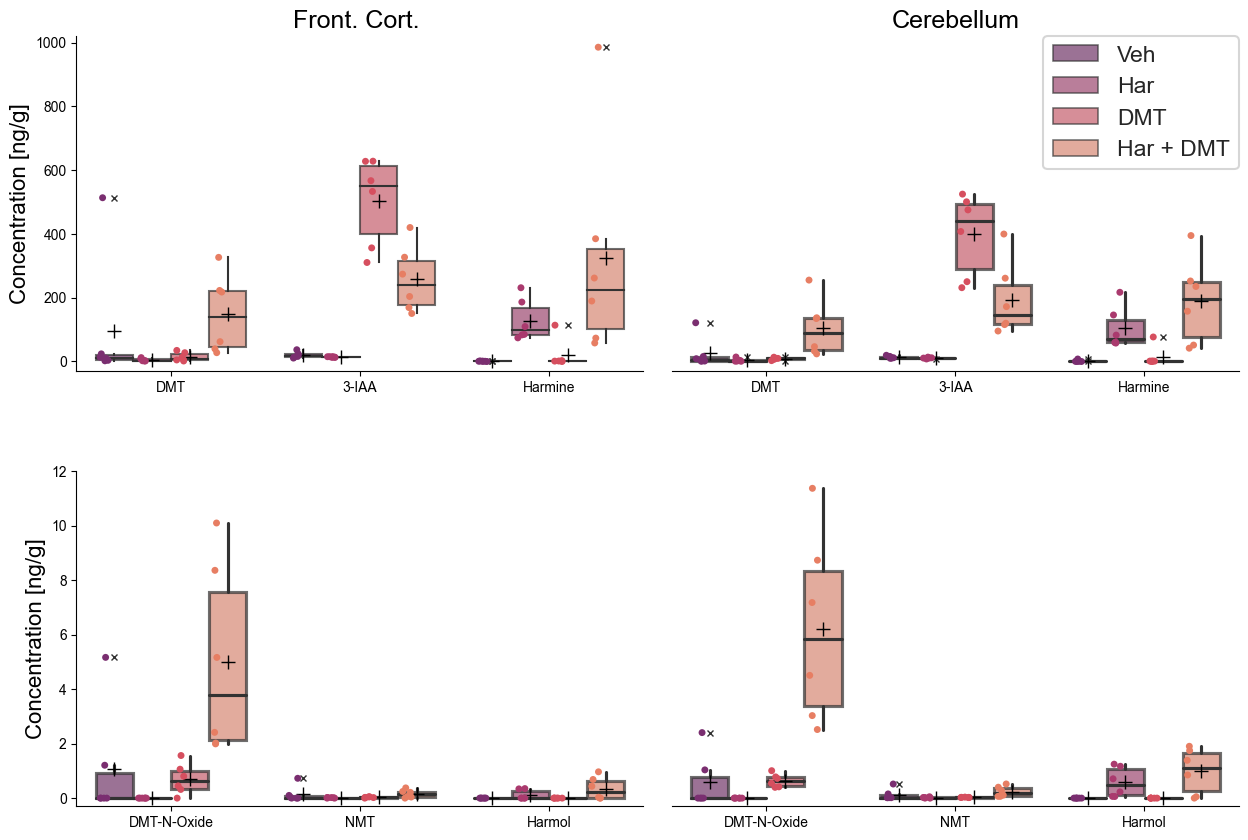

In [20]:
f, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw=dict(width_ratios=[1, 1]))
plt.subplots_adjust(hspace = 0.3, wspace = 0.05)

# DMT, 3-IAA, harmine -> front. cortex
g = sns.boxplot(x='Component Name', y='Calculated Concentration µg/L', data=df_brain_high[df_brain_high['Sample Number']==2], 
                order=['DMT', '3-IAA', 'Harmine'], 
                hue='Treatment_Group', hue_order=ls_group, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette='flare_r', showcaps=False, flierprops={"marker": "x"}, width=.8, boxprops={'alpha': 0.7}, ax=axs[0,0]) 

sns.set(style="ticks", context="talk", rc={"figure.figsize":(20, 10)})

old_len_collections = len(g.collections)
sns.stripplot(x='Component Name', y='Calculated Concentration µg/L', data=df_brain_high[df_brain_high['Sample Number']==2],
              order=['DMT', '3-IAA', 'Harmine'], 
              hue='Treatment_Group', hue_order=ls_group, ax=g, palette='flare_r', dodge=True)

            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([-0.05, 0]))

#sns.despine()
axs[0,0].get_legend().remove()
axs[0,0].set(ylim=(-30, 1020))


g.set_title('Front. Cort. ')
g.set_ylabel('Concentration [ng/g]', fontsize=16)
g.set_xlabel(None)
g.spines[['right', 'top']].set_visible(False)


# # DMT, 3-IAA, harmine -> cerebellum
g = sns.boxplot(x='Component Name', y='Calculated Concentration µg/L', data=df_brain_high[df_brain_high['Sample Number']==1], 
                order=['DMT', '3-IAA', 'Harmine'], 
                hue='Treatment_Group', hue_order=ls_group, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette='flare_r', showcaps=False, flierprops={"marker": "x"}, width=.8, boxprops={'alpha': 0.7}, ax=axs[0,1]) 

sns.set(style="ticks", context="talk", rc={"figure.figsize":(15, 10)})

old_len_collections = len(g.collections)
sns.stripplot(x='Component Name', y='Calculated Concentration µg/L', data=df_brain_high[df_brain_high['Sample Number']==1],
              order=['DMT', '3-IAA', 'Harmine'], 
              hue='Treatment_Group', hue_order=ls_group, ax=g, palette='flare_r', dodge=True)

            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([-0.05, 0]))

#sns.despine()
axs[0,1].get_legend().remove()
axs[0,1].set(ylim=(-30, 1020))


g.set_title('Cerebellum')
g.set_ylabel(None)
g.set_xlabel(None)
g.tick_params(left = False, right = False , labelleft = False) 
                #labelbottom = False, bottom = False)
g.spines[['left', 'right', 'top']].set_visible(False)


# DMT-N-Oxide, NMT, Harmol -> front cortex
g = sns.boxplot(x='Component Name', y='Calculated Concentration µg/L', data=df_brain_low[df_brain_low['Sample Number']==2], 
                order=['DMT-N-Oxide', 'NMT', 'Harmol'],
                hue='Treatment_Group', hue_order=ls_group, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette='flare_r', showcaps=False, flierprops={"marker": "x"}, width=.8, boxprops={'alpha': 0.7}, ax=axs[1,0]) 

sns.set(style="ticks", context="talk", rc={"figure.figsize":(20, 10)})

old_len_collections = len(g.collections)
sns.stripplot(x='Component Name', y='Calculated Concentration µg/L', data=df_brain_low[df_brain_low['Sample Number']==2],
              order=['DMT-N-Oxide', 'NMT', 'Harmol'],
              hue='Treatment_Group', hue_order=ls_group, ax=g, palette='flare_r', dodge=True)

            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([-0.05, 0]))

#sns.despine()
axs[1,0].get_legend().remove()
axs[1,0].set(ylim=(-0.3, 12))


#g.set_title('Front. Cort. ')
g.set_ylabel('Concentration [ng/g]', fontsize=16)
g.set_xlabel(None)
g.spines[['right', 'top']].set_visible(False)



# DMT-N-Oxide, NMT, Harmol -> cerebellum
g = sns.boxplot(x='Component Name', y='Calculated Concentration µg/L', data=df_brain_low[df_brain_low['Sample Number']==1], 
                order=['DMT-N-Oxide', 'NMT', 'Harmol'],
                hue='Treatment_Group', hue_order=ls_group, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette='flare_r', showcaps=False, flierprops={"marker": "x"}, width=.8, boxprops={'alpha': 0.7}, ax=axs[1,1]) 

sns.set(style="ticks", context="talk", rc={"figure.figsize":(20, 10)})

old_len_collections = len(g.collections)
sns.stripplot(x='Component Name', y='Calculated Concentration µg/L', data=df_brain_low[df_brain_low['Sample Number']==1],
              order=['DMT-N-Oxide', 'NMT', 'Harmol'],
              hue='Treatment_Group', hue_order=ls_group, ax=g, palette='flare_r', dodge=True)

            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([-0.05, 0]))

#sns.despine()
axs[1,1].get_legend().remove()
axs[1,1].set(ylim=(-0.3, 12))



g.set_ylabel(None)
g.set_xlabel(None)
g.tick_params(left = False, right = False , labelleft = False) 
                #labelbottom = False, bottom = False)
g.spines[['left', 'right', 'top']].set_visible(False)
    
# Get the handles and labels. For this example it'll be 2 tuples of length 4 each.
handles, labels = g.get_legend_handles_labels()

# When creating the legend, only use the first two elements to effectively remove the last two.
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.0, 2.3), loc=0, borderaxespad=0.)
for handle in l.legendHandles:
    handle.set_alpha(0.7)    

#rasterized needed for .eps to account for transparency (that comes with the confidence intervals of the regression line)
fig = g.get_figure()

fig.set_rasterized(True)
fig.savefig(f'{analysis_path}/plots_for_paper/brain_concentrations_plot.eps', dpi=300, format='eps')
fig.savefig(f'{analysis_path}/plots_for_paper/brain_concentrations_plot.png')

#order=['DMT-N-Oxide', 'NMT', 'Harmol'],

## Add molecular weights to dataframe

In [21]:
def mol_weights (row):
    if row['Component Name']=='DMT':
        return '188.274'
    if row['Component Name']=='3-IAA':
        return '175.187'
    if row['Component Name']=='NMT':
        return '174.247'
    if row['Component Name']=='DMT-N-Oxide':
        return '204.273'
    if row['Component Name']=='Harmine':
        return '212.25'
    if row['Component Name']=='Harmol':
        return '198.225'



In [22]:
df_brain_molar_conc = df_brain.copy()

df_brain_molar_conc.insert(loc=9, column='mol_weight', value=df_brain_molar_conc.apply(lambda row: mol_weights (row), axis=1))
df_brain_molar_conc.mol_weight = pd.to_numeric(df_brain_molar_conc.mol_weight, errors='coerce')
df_brain_molar_conc['molar_concentration nmol/L'] = 1000*df_brain_molar_conc['Calculated Concentration µg/L']/df_brain_molar_conc['mol_weight']

df_brain_molar_conc.to_excel(f'{analysis_path}/02_Results_concentration_brain.xlsx', index=False)

In [23]:
#treat_group = ['Har + DMT', 'DMT', 'Har', 'Veh']
treat_group = ['Har + DMT', 'DMT']

In [24]:
## for percentages take molar weights into account: 
# here all is calculated with the molar concentrations


list_total_dmt_front_cort = []
list_dmt_only_front_cort = []
list_IAA_only_front_cort = []
list_NMT_only_front_cort = []
list_NOxide_only_front_cort = []
region_front = ['front cort', 'front cort'] #, 'front cort', 'front cort']

list_total_dmt_cerebellum = []
list_dmt_only_cerebellum = []
list_IAA_only_cerebellum = []
list_NMT_only_cerebellum = []
list_NOxide_only_cerebellum = []
region_cereb = ['cerbellum', 'cerbellum'] #, 'cerbellum', 'cerbellum']

list_total_dmt_both = []
list_dmt_only_both = []
list_IAA_only_both = []
list_NMT_only_both = []
list_NOxide_only_both = []
region_both = ['average', 'average'] #, 'cerbellum', 'cerbellum']

molar_weight_DMT = 188.274 # g/mol
molar_weight_3IAA = 175.187 # g/mol
molar_weight_NMT = 174.247 # g/mol
molar_weight_NOxide = 204.273 # g/mol



for group in treat_group:
    
    ### frontal cortex
    total_dmt_front_cort = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==2)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     ((df_brain_molar_conc['Component Name']=='DMT') | 
                                     (df_brain_molar_conc['Component Name']=='3-IAA') | 
                                     (df_brain_molar_conc['Component Name']=='NMT') | 
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide'))].sum()/6, decimals =2)
    list_total_dmt_front_cort.append(total_dmt_front_cort)
    
    
    dmt_only_front_cort = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==2)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT')].mean(), decimals =2)
    list_dmt_only_front_cort.append(dmt_only_front_cort)
    
    
    IAA_only_front_cort = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==2)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='3-IAA')].mean(), decimals =2)
    list_IAA_only_front_cort.append(IAA_only_front_cort)
    
    
    NMT_only_front_cort = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==2)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='NMT')].mean(), decimals =2)
    list_NMT_only_front_cort.append(NMT_only_front_cort)
    
    
    NOxide_only_front_cort = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==2)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide')].mean(), decimals =2)
    list_NOxide_only_front_cort.append(NOxide_only_front_cort)
    
    
    
    ### cerebellum
    total_dmt_cerebellum = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==1)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     ((df_brain_molar_conc['Component Name']=='DMT') | 
                                     (df_brain_molar_conc['Component Name']=='3-IAA') | 
                                     (df_brain_molar_conc['Component Name']=='NMT') | 
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide'))].sum()/6, decimals =2)
    list_total_dmt_cerebellum.append(total_dmt_cerebellum)
    
    
    dmt_only_cerebellum = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==1)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT')].mean(), decimals =2)
    list_dmt_only_cerebellum.append(dmt_only_cerebellum)
    
    
    IAA_only_cerebellum = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==1)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='3-IAA')].mean(), decimals =2)
    list_IAA_only_cerebellum.append(IAA_only_cerebellum)
    
    
    NMT_only_cerebellum = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==1)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='NMT')].mean(), decimals =2)
    list_NMT_only_cerebellum.append(NMT_only_cerebellum)
    
    
    NOxide_only_cerebellum = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Sample Number']==1)  & (df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide')].mean(), decimals =2)
    list_NOxide_only_cerebellum.append(NOxide_only_cerebellum)
    
    
    ### both regions
    total_dmt_both = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Treatment_Group']==group) &
                                     ((df_brain_molar_conc['Component Name']=='DMT') | 
                                     (df_brain_molar_conc['Component Name']=='3-IAA') | 
                                     (df_brain_molar_conc['Component Name']=='NMT') | 
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide'))].sum()/12, decimals =2)
    list_total_dmt_both.append(total_dmt_both)
    
    
    dmt_only_both = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT')].mean(), decimals =2)
    list_dmt_only_both.append(dmt_only_both)
    
    
    IAA_only_both = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='3-IAA')].mean(), decimals =2)
    list_IAA_only_both.append(IAA_only_both)
    
    
    NMT_only_both = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='NMT')].mean(), decimals =2)
    list_NMT_only_both.append(NMT_only_both)
    
    
    NOxide_only_both = np.round(df_brain_molar_conc['molar_concentration nmol/L']
                                    [(df_brain_molar_conc['Treatment_Group']==group) &
                                     (df_brain_molar_conc['Component Name']=='DMT-N-Oxide')].mean(), decimals =2)
    list_NOxide_only_both.append(NOxide_only_both)
    
    
df_mean_front = pd.DataFrame(data=[treat_group, region_front,list_total_dmt_front_cort, 
                                  list_dmt_only_front_cort, 
                                  list_IAA_only_front_cort, 
                                  list_NMT_only_front_cort, 
                                  list_NOxide_only_front_cort]).T 
df_mean_front.columns= ['Treatment_Group',' Region', 'Total DMT', 'DMT', '3-IAA', 'NMT', 'DMT-N-Oxide']

df_mean_cereb = pd.DataFrame(data=[treat_group, region_cereb, list_total_dmt_cerebellum, 
                                  list_dmt_only_cerebellum, 
                                  list_IAA_only_cerebellum, 
                                  list_NMT_only_cerebellum, 
                                  list_NOxide_only_cerebellum]).T 
df_mean_cereb.columns= ['Treatment_Group',' Region', 'Total DMT', 'DMT', '3-IAA', 'NMT', 'DMT-N-Oxide']

df_mean_both = pd.DataFrame(data=[treat_group, region_both, list_total_dmt_both, 
                                  list_dmt_only_both, 
                                  list_IAA_only_both, 
                                  list_NMT_only_both, 
                                  list_NOxide_only_both]).T 
df_mean_both.columns= ['Treatment_Group',' Region', 'Total DMT', 'DMT', '3-IAA', 'NMT', 'DMT-N-Oxide']



df_mean_conc = pd.concat([df_mean_front, df_mean_cereb, df_mean_both], ignore_index = True)

df_mean_conc.insert(loc=7, column ='% DMT', value=np.round((100*df_mean_conc.iloc[:,3].astype(float)/df_mean_conc.iloc[:,2].astype(float)), decimals=1))
df_mean_conc.insert(loc=8, column ='% 3-IAA', value=np.round((100*df_mean_conc.iloc[:,4].astype(float)/df_mean_conc.iloc[:,2].astype(float)), decimals=1))
df_mean_conc.insert(loc=9, column ='% NMT', value=np.round((100*df_mean_conc.iloc[:,5].astype(float)/df_mean_conc.iloc[:,2].astype(float)), decimals=1))
df_mean_conc.insert(loc=10, column ='% DMT-N-Oxide', value=np.round((100*df_mean_conc.iloc[:,6].astype(float)/df_mean_conc.iloc[:,2].astype(float)), decimals=1))

# calculation of means in ng/n again
df_mean_conc.insert(loc=11, column ='ng/g DMT', value=np.round((molar_weight_DMT*df_mean_conc.iloc[:,3]/1000).astype(float), decimals=1))
df_mean_conc.insert(loc=12, column ='ng/g 3-IAA', value=np.round((molar_weight_3IAA*df_mean_conc.iloc[:,4]/1000).astype(float), decimals=1))
df_mean_conc.insert(loc=13, column ='ng/g NMT', value=np.round((molar_weight_NMT*df_mean_conc.iloc[:,5]/1000).astype(float), decimals=1))
df_mean_conc.insert(loc=14, column ='ng/g DMT-N-Oxide', value=np.round((molar_weight_NOxide*df_mean_conc.iloc[:,6]/1000).astype(float), decimals=1))



In [25]:
df_mean_conc.to_excel(f'{analysis_path}/04_chemistry_table_exp1.xlsx', index=False)